In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas_datareader import data as wb

In [55]:
stocks = ['TSLA', 'GOOG', 'XOM', 'EIX']
start = "2016-01-01"
end = "2017-12-31"
mydata = pd.DataFrame()
for stock in stocks:
    mydata[stock] = wb.DataReader(stock, 'google', start=start, end=end)['Close']

In [56]:
mydata.head()

,TSLA,GOOG,XOM,EIX
Date,,,,
2016-01-04,223.41,741.84,77.46,58.95
2016-01-05,223.43,742.58,78.12,58.97
2016-01-06,219.04,743.62,77.47,58.58
2016-01-07,215.65,726.39,76.23,58.29
2016-01-08,211.00,714.47,74.69,58.28


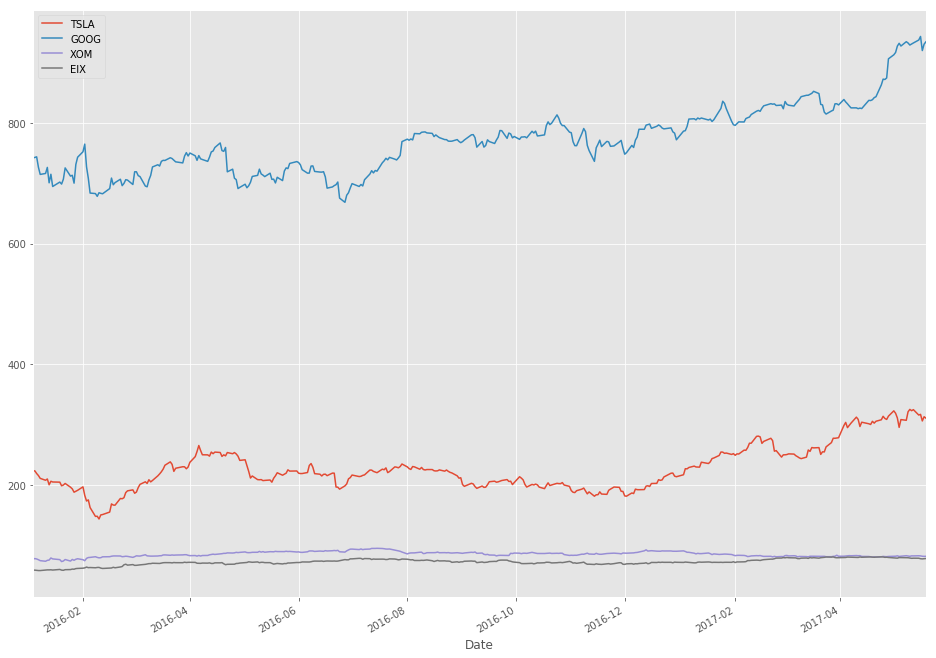

In [57]:
mydata.plot(figsize=(16,12))

### Returns

In [58]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,TSLA,GOOG,XOM,EIX
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.000090,0.000998,0.008521,0.000339
2016-01-06,-0.019648,0.001401,-0.008321,-0.006614
2016-01-07,-0.015477,-0.023170,-0.016006,-0.004950
2016-01-08,-0.021563,-0.016410,-0.020202,-0.000172


In [59]:
weights = np.array([0.25,0.25,0.25,0.25])

In [60]:
weights[3]

0.25

### diversifiable risk = portfolio variance - weighted annual variance

In [76]:
tesla_var = returns['TSLA'].var()*250
tesla_var

0.1389299042971169

In [77]:
goog_var = returns['GOOG'].var()* 250
goog_var

0.03354760045436061

In [78]:
exon_var = returns['XOM'].var()* 250
exon_var 


0.03156137229899981

In [79]:
sce_var = returns['EIX'].var()* 250
sce_var

0.026010025927808458

In [65]:
returns.var()*250

TSLA    0.138930
GOOG    0.033548
XOM     0.031561
EIX     0.026010
dtype: float64

# because STD is sqrt of variance, sqrt 250 days is necessary

In [66]:
def risk(ticker):
    daily_return = np.log((ticker) / (ticker.shift(1)))
    return daily_return.std() * 250**0.5
    print(str(round(daily_return.std() * 250**0.5, 5)))

In [67]:
returns[['TSLA', 'GOOG', 'XOM', 'EIX']].mean()*250

TSLA    0.307758
GOOG    0.182811
XOM     0.056120
EIX     0.216648
dtype: float64

In [68]:
returns[['TSLA', 'GOOG', 'XOM', 'EIX']].std() * 250 **0.5

TSLA    0.372733
GOOG    0.183160
XOM     0.177655
EIX     0.161276
dtype: float64

### Covariance

In [69]:
returns.cov() * 250

,TSLA,GOOG,XOM,EIX
TSLA,0.138930,0.019404,0.007199,0.004220
GOOG,0.019404,0.033548,0.006305,0.003536
XOM,0.007199,0.006305,0.031561,0.003366
EIX,0.004220,0.003536,0.003366,0.026010


### Correlation

In [70]:
returns.corr()

,TSLA,GOOG,XOM,EIX
TSLA,1.000000,0.284223,0.108710,0.070199
GOOG,0.284223,1.000000,0.193766,0.119703
XOM,0.108710,0.193766,1.000000,0.117485
EIX,0.070199,0.119703,0.117485,1.000000


### Calculating Portfolio Risk
- Portfolio variance

In [71]:
port_variance = np.dot(weights.T,np.dot(returns.cov()*250, weights))
port_variance

0.019881723604005183

In [72]:
port_volitility = np.dot(weights.T,np.dot(returns.cov()*250, weights))**0.5
port_volitility

0.14100256594830174

In [73]:
print(str(round(port_volitility, 5)*100)+'%')

14.1%


# Diversifiable and Non Diversifiable Risk

In [74]:
weights[0]

0.25

### diversifiable_risk = portfolio_variance - weighted_annual_variance

In [80]:
diver_risk = (port_variance - (weights[0]**2 * tesla_var)-(weights[1] * goog_var)-(weights[2]**2 * exon_var)-(weights[3]**2 * sce_var))
diver_risk

-0.00078650791733029233

In [82]:
print(str(round(diver_risk*100,5))+'%')

-0.07865%


# Non Diversifiable risk

In [83]:
non_diver = port_variance - diver_risk

In [85]:
non_diver

0.020668231521335477